In [1]:
import matplotlib.pyplot as plt
import numpy as np

import torch
# import pandas as pd
# import seaborn as sb

import process
import acquire
import prepare

import torch
import torch.nn as nn
import torch.optim as optim



In [9]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
# train_size = int(0.8 * len(full_dataset))
# test_size = len(full_dataset) - train_size
# train_dataset, test_dataset = torch.utils.data.random_split(full_dataset, [train_size, test_size])

In [21]:
# dataset = np.loadtxt('diabetes.csv', delimiter=',')
# X = dataset[0:,0:8]
# y = dataset[0:,8]
 
# X = torch.tensor(X, dtype=torch.float32)
# y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

# print(X.shape,y.shape)

torch.Size([768, 8]) torch.Size([768, 1])


In [22]:
# # define the model
# model = nn.Sequential(
#     nn.Linear(8, 12),
#     nn.ReLU(),
#     nn.Linear(12, 8),
#     nn.ReLU(),
#     nn.Linear(8, 1),
#     nn.Sigmoid()
# )
# print(model)
 
# # train the model
# loss_fn   = nn.BCELoss()  # binary cross entropy
# optimizer = optim.Adam(model.parameters(), lr=0.001)
 
# n_epochs = 100
# batch_size = 10
 
# for epoch in range(n_epochs):
#     for i in range(0, len(X), batch_size):
#         Xbatch = X[i:i+batch_size]
#         y_pred = model(Xbatch)
#         ybatch = y[i:i+batch_size]
#         loss = loss_fn(y_pred, ybatch)
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
#     print(f'Finished epoch {epoch}, latest loss {loss}')
 
# # compute accuracy (no_grad is optional)
# with torch.no_grad():
#     y_pred = model(X)
# accuracy = (y_pred.round() == y).float().mean()
# print(f"Accuracy {accuracy}")

Sequential(
  (0): Linear(in_features=8, out_features=12, bias=True)
  (1): ReLU()
  (2): Linear(in_features=12, out_features=8, bias=True)
  (3): ReLU()
  (4): Linear(in_features=8, out_features=1, bias=True)
  (5): Sigmoid()
)
Finished epoch 0, latest loss 0.5554956197738647
Finished epoch 1, latest loss 0.515282154083252
Finished epoch 2, latest loss 0.5012320280075073
Finished epoch 3, latest loss 0.49262163043022156
Finished epoch 4, latest loss 0.48635333776474
Finished epoch 5, latest loss 0.4808579981327057
Finished epoch 6, latest loss 0.47593432664871216
Finished epoch 7, latest loss 0.4744464159011841
Finished epoch 8, latest loss 0.4704131484031677
Finished epoch 9, latest loss 0.4654172360897064
Finished epoch 10, latest loss 0.46292564272880554
Finished epoch 11, latest loss 0.460580050945282
Finished epoch 12, latest loss 0.45641645789146423
Finished epoch 13, latest loss 0.4518009424209595
Finished epoch 14, latest loss 0.452326238155365
Finished epoch 15, latest loss 0

In [2]:
tensor_data = torch.load("./data.pt")
tensor_label = torch.load("./label.pt")[:,None]

print(tensor_data.shape, tensor_label.shape)

torch.Size([31267, 980]) torch.Size([31267, 1])


In [13]:
X = tensor_data.to(device)
print(X.is_cuda)
y = tensor_label.float().to(device)
print(y.is_cuda)


True
True


In [14]:
# define the model
model = nn.Sequential(
    nn.Linear(980, 1200),
    nn.ReLU(),
    nn.Linear(1200, 500),
    nn.ReLU(),
    nn.Linear(500, 5),
    nn.ReLU(),
    nn.Linear(5, 1),
    nn.Sigmoid()
)
print(model)

model.to(device)
 
# train the model
loss_fn   = nn.BCELoss()  # binary cross entropy
optimizer = optim.Adam(model.parameters(), lr=0.001)
 
n_epochs = 100
batch_size = 10
 
for epoch in range(n_epochs):
    for i in range(0, len(X), batch_size):
        Xbatch = X[i:i+batch_size]
        y_pred = model(Xbatch)
        ybatch = y[i:i+batch_size]
        loss = loss_fn(y_pred, ybatch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'Finished epoch {epoch}, latest loss {loss}')
 
# compute accuracy (no_grad is optional)
with torch.no_grad():
    y_pred = model(X)
accuracy = (y_pred.round() == y).float().mean()
print(f"Accuracy {accuracy}")

Sequential(
  (0): Linear(in_features=980, out_features=1200, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1200, out_features=500, bias=True)
  (3): ReLU()
  (4): Linear(in_features=500, out_features=5, bias=True)
  (5): ReLU()
  (6): Linear(in_features=5, out_features=1, bias=True)
  (7): Sigmoid()
)
Finished epoch 0, latest loss 0.9950822591781616
Finished epoch 1, latest loss 0.9825893640518188
Finished epoch 2, latest loss 0.7620827555656433


In [ ]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title("Learning rate %f"%(learning_rate))
plt.show()

In [2]:
tensor_img = torch.load("./img_tensor.pt")
tensor_gal = torch.load("./gal_tensor.pt").int()
tensor_sta = torch.load("./star_tensor.pt").int()

In [10]:
tensor_img.shape

torch.Size([11, 1489, 2048, 5])

In [3]:
dist_from_center = 7
label = []
data = []
shift_x, shift_y =(13 + dist_from_center,4 + dist_from_center)

for i in range(tensor_img.shape[0]):
    selection_gal = torch.logical_and(tensor_gal[i,:,1]> shift_x ,tensor_gal[i,:,1]< 2048 - shift_x)
    selection_gal = torch.logical_and(selection_gal,tensor_gal[i,:,0]> shift_y)
    selection_gal = torch.logical_and(selection_gal,tensor_gal[i,:,0]< 1489 - shift_y)

    data += [prepare.extract_data_from_coord(tensor_img[i],coord[1],coord[0],dist_from_center) for coord in tensor_gal[i][selection_gal]]
    label += [0] * len(tensor_gal[i][selection_gal])

    selection_sta = torch.logical_and(tensor_sta[i,:,1]> shift_x ,tensor_sta[i,:,1]< 2048 - shift_x)
    selection_sta = torch.logical_and(selection_sta,tensor_sta[i,:,0]> shift_y)
    selection_sta = torch.logical_and(selection_sta,tensor_sta[i,:,0]< 1489 - shift_y)
    
    data += [prepare.extract_data_from_coord(tensor_img[i],coord[1],coord[0],dist_from_center) for coord in tensor_sta[i][selection_sta]]
    label += [1] * len(tensor_sta[i][selection_sta])

prepare.save_data(torch.vstack(data), 'data')
prepare.save_data(torch.tensor(label), 'label')





In [3]:
# #quantile 50 -> 10
# #quantile 60 -> 7


# img = 1
# frame = 7

# x = tensor_sta[img,:,1]
# y = tensor_sta[img,:,0]


# for index in range(1):
#     if(y[index]<frame or y[index]>1488-frame or x[index]<frame or x[index]>2048-frame):
#         continue

#     print(prepare.extract_data_from_coord(tensor_img[img],x[index],y[index],frame).shape)

torch.Size([980])


In [3]:

# for i in range(5):
#     band = torch.flatten(tensor_img[:,:,:,i])
#     band_min = torch.min(band)
#     band_max = torch.max(band)

#     band = (band - band_min) / (band_max - band_min)

#     values = [10,20,30,40,50,60,70,80,90,95,97,98,99]
#     bands_percentile = []
#     for j in values:
#         bands_percentile.append(np.percentile(band, j))

#     plt.bar(values, bands_percentile)
#     plt.show()


In [21]:
# bands_thresholds = []

# bands = ["g", "r", "i", "u", "z"]

# for i in range(5):
#     band = torch.flatten(tensor_img[:,:,:,i])
#     # df = pd.DataFrame(band)
#     # print(bands[i], file=f)
#     # print(df.describe(), file=f)
#     bands_thresholds.append(np.percentile(band, 60))


# print(bands_thresholds)

[0.005950927734375, 0.0117034912109375, 0.019683837890625, 0.012908935546875, 0.0570068359375]


In [23]:

# frame_list = [6,8,10,12]
# amount = 10

# for img in range(amount):
    
#     x = tensor_gal[img,:,1]
#     y = tensor_gal[img,:,0]

#     # zip_coor = torch.stack([x,y], dim=1) 
#     optimal_frames = [] 
#     for index in range(len(x)):
#         if(x[index]<30 or x[index]>1459 or y[index]<30 or y[index]>2008):
#             continue
        
#         optimal_frame = 0

#         for j in range(5):
#             for i in frame_list:
#                 total_edge_value = torch.sum(tensor_img[img, x[index]-i, y[index]-i:y[index]+i, j]) + torch.sum(tensor_img[img, x[index]+i, y[index]-i:y[index]+i, j]) + torch.sum(tensor_img[img, x[index]-i+1:x[index]+i-1, y[index]-i, j]) + torch.sum(tensor_img[img, x[index]-i+1:x[index]+i-1, y[index]+i, j])

#                 average = total_edge_value / ((2*i-1)*4)

#                 if(average < bands_thresholds[j]):
#                     optimal_frame += i
#                     break
                
#                 if(i == max(frame_list)):
#                     optimal_frame += i
            
        
#         optimal_frames.append( optimal_frame / 5)
    
#     print(f'50%per: {np.percentile(np.array(optimal_frames), 50)}')
#     print(f'median: {np.median(np.array(optimal_frames))}')


# print('========================')

# for img in range(amount):
    
#     x = tensor_sta[img,:,1]
#     y = tensor_sta[img,:,0]

#     # zip_coor = torch.stack([x,y], dim=1) 
#     optimal_frames = [] 
#     for index in range(len(x)):
#         if(x[index]<30 or x[index]>1459 or y[index]<30 or y[index]>2018):
#             continue
        
#         optimal_frame = 0

#         for j in range(5):
#             for i in frame_list:
#                 total_edge_value = torch.sum(tensor_img[img, x[index]-i, y[index]-i:y[index]+i, j]) + torch.sum(tensor_img[img, x[index]+i, y[index]-i:y[index]+i, j]) + torch.sum(tensor_img[img, x[index]-i+1:x[index]+i-1, y[index]-i, j]) + torch.sum(tensor_img[img, x[index]-i+1:x[index]+i-1, y[index]+i, j])

#                 average = total_edge_value / ((2*i-1)*4)

#                 if(average < bands_thresholds[j]):
#                     optimal_frame += i
#                     break
                
#                 if(i == max(frame_list)):
#                     optimal_frame += i
            
        
#         optimal_frames.append( optimal_frame / 5)
    
#     print(f'50%per: {np.percentile(np.array(optimal_frames), 50)}')
#     print(f'median: {np.median(np.array(optimal_frames))}')


50%per: 12.0
median: 12.0
50%per: 6.0
median: 6.0
50%per: 6.4
median: 6.4
50%per: 6.0
median: 6.0
50%per: 6.0
median: 6.0
50%per: 6.0
median: 6.0
50%per: 6.4
median: 6.4
50%per: 6.4
median: 6.4
50%per: 6.4
median: 6.4
50%per: 6.8
median: 6.8
50%per: 11.6
median: 11.6
50%per: 6.0
median: 6.0
50%per: 6.0
median: 6.0
50%per: 6.0
median: 6.0
50%per: 6.0
median: 6.0
50%per: 6.0
median: 6.0
50%per: 6.4
median: 6.4
50%per: 6.4
median: 6.4
50%per: 6.0
median: 6.0
50%per: 6.8
median: 6.8


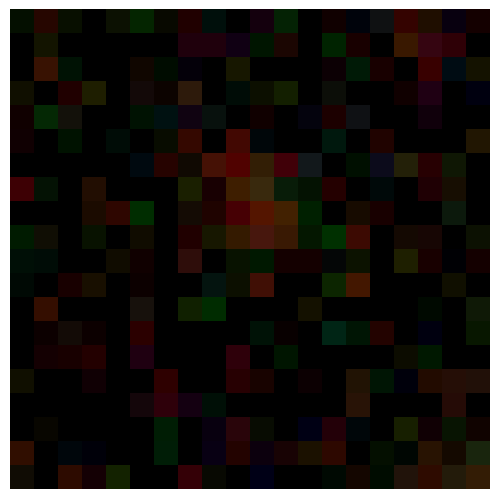

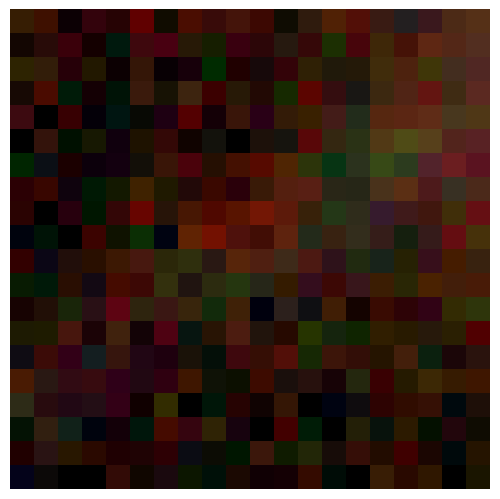

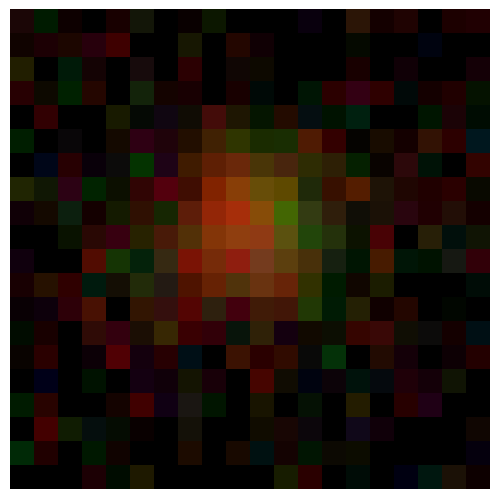

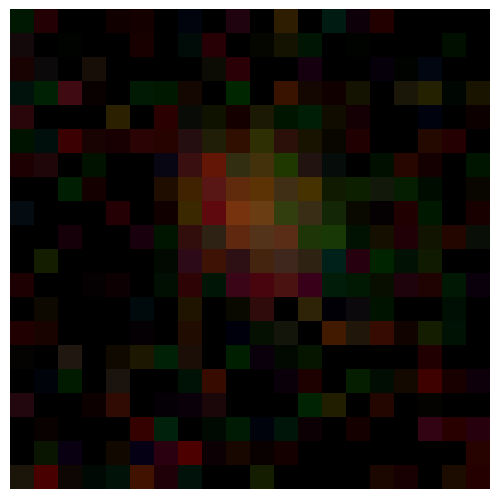

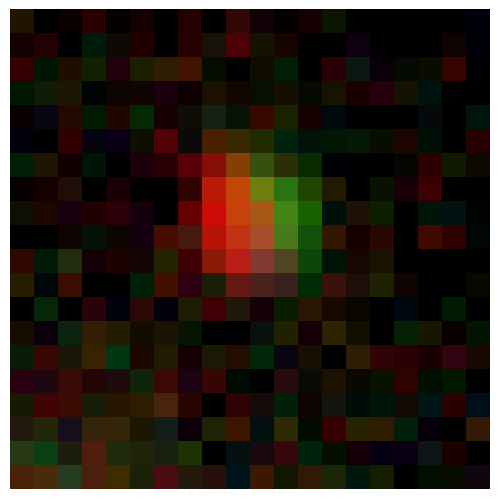

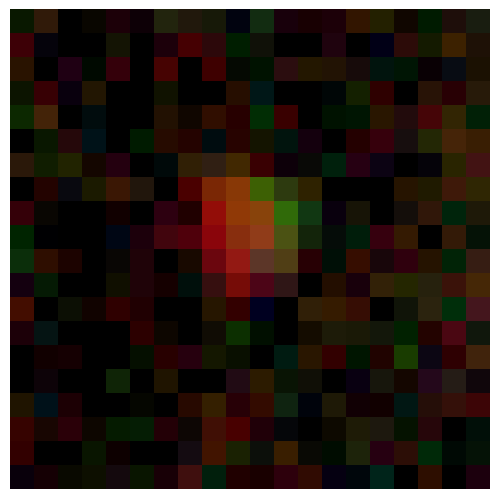

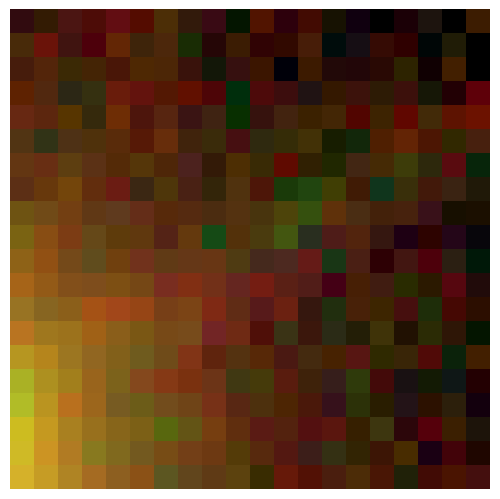

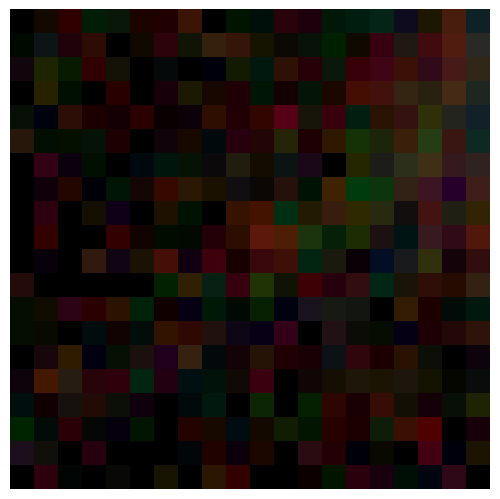

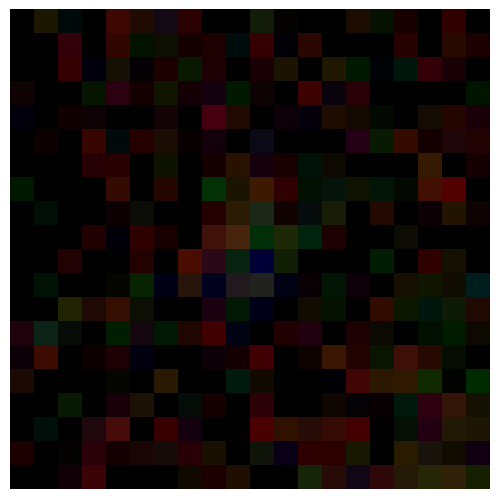

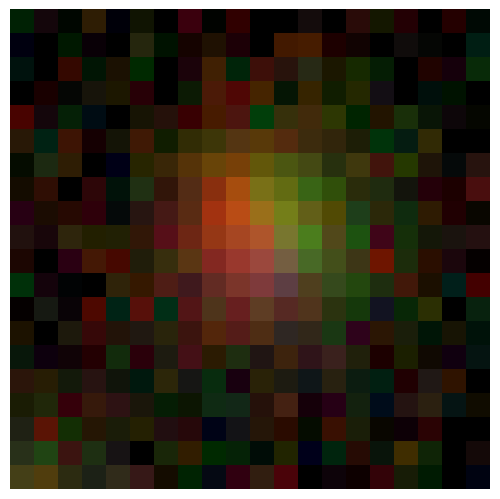

In [4]:
# # #quantile 50 -> 10
# # #quantile 60 -> 7


# img = 1
# frame = 10

# x = tensor_gal[img,:,1]
# y = tensor_gal[img,:,0]


# for index in range(10):
#     if(x[index]<frame or x[index]>1488-frame or y[index]<frame or y[index]>2048-frame):
#         continue
#     process.create_rbg(tensor_img[img,x[index]-frame:x[index]+frame,y[index]-frame:y[index]+frame,0],
#                        tensor_img[img,x[index]-frame:x[index]+frame,y[index]-frame:y[index]+frame,1],
#                        tensor_img[img,x[index]-frame:x[index]+frame,y[index]-frame:y[index]+frame,2])



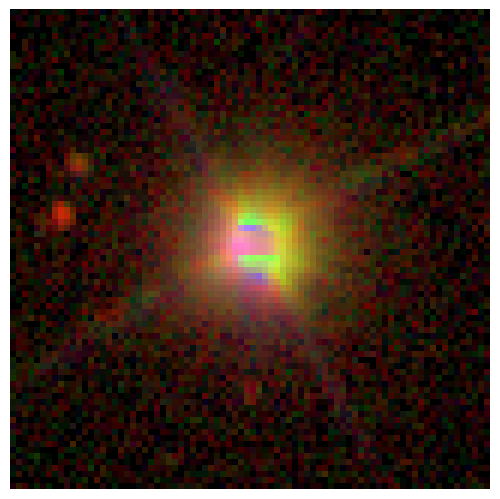

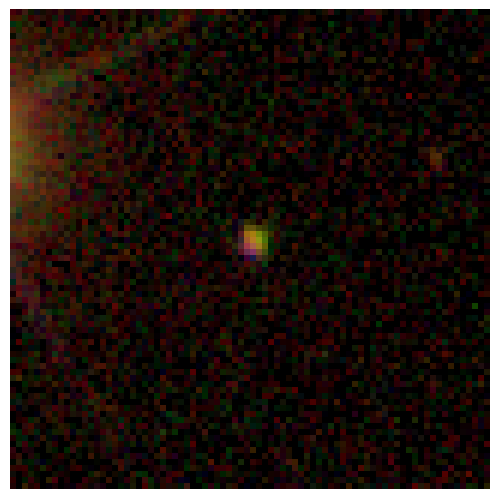

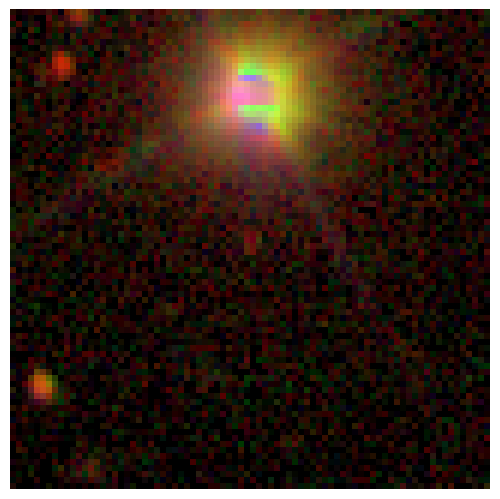

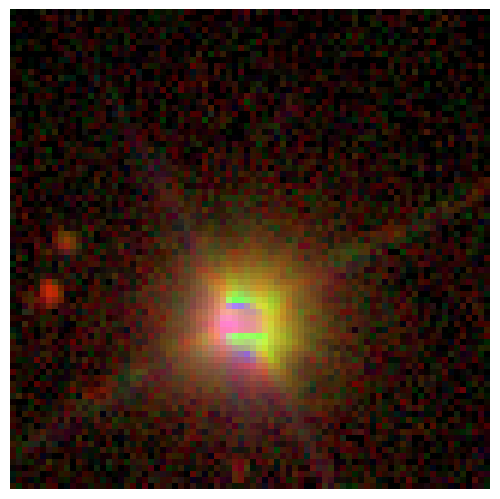

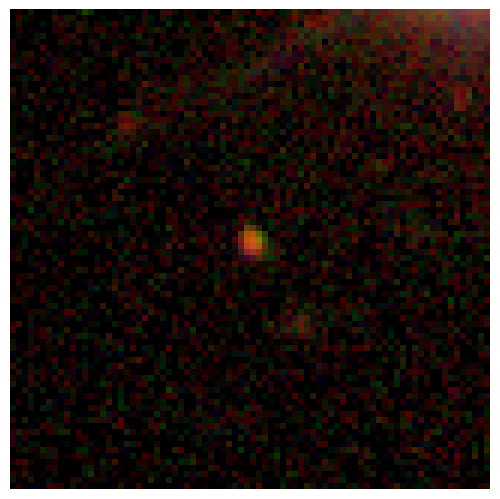

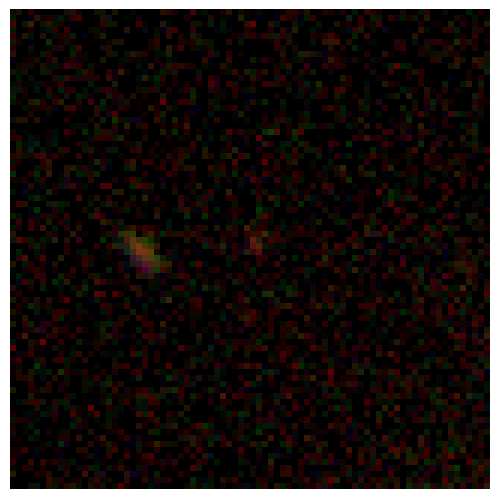

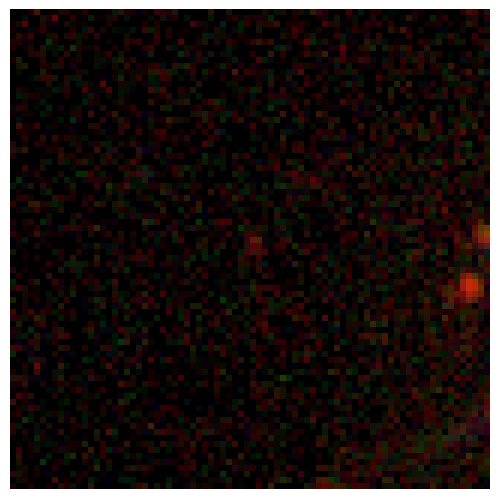

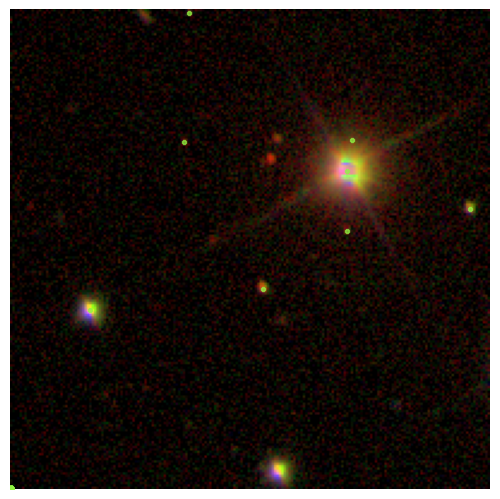

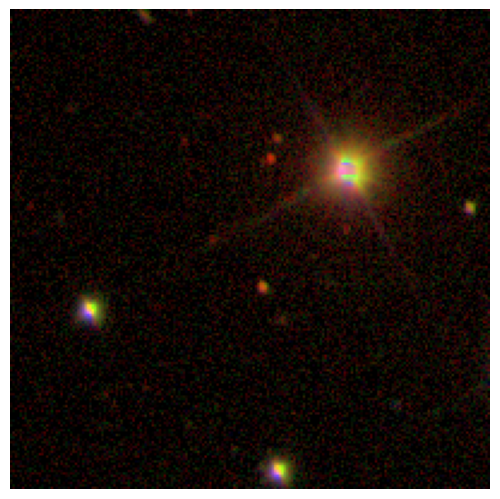

In [14]:
# img = 1
# frame = 6
# limit = 200

# # selection_gal = torch.logical_and(tensor_gal[img,:,0]<limit,tensor_gal[img,:,1]<limit)
# selection_sta = torch.logical_and(tensor_sta[img,:,0]<limit,tensor_sta[img,:,1]<limit)

# x = tensor_sta[img,:,0][selection_sta]
# y = tensor_sta[img,:,1][selection_sta]


# for index in range(8):
#     if(x[index]<frame or x[index]>1488-frame or y[index]<frame or y[index]>2048-frame):
#         continue
#     process.create_rbg(tensor_img[img,x[index]-frame:x[index]+frame,y[index]-frame:y[index]+frame,0],
#                        tensor_img[img,x[index]-frame:x[index]+frame,y[index]-frame:y[index]+frame,1],
#                        tensor_img[img,x[index]-frame:x[index]+frame,y[index]-frame:y[index]+frame,2])

# process.create_rbg(tensor_img[img,:limit,:limit,0],tensor_img[img,:limit,:limit,1],tensor_img[img,:limit,:limit,2])
# plt.scatter(x, y, alpha=0.7, s=10, marker='P', c='#90f542')

# process.create_rbg(tensor_img[img,:limit,:limit,0],tensor_img[img,:limit,:limit,1],tensor_img[img,:limit,:limit,2])
# # plt.scatter(tensor_sta[i,:,0][selection_sta], tensor_sta[i,:,1][selection_sta], alpha=0.7, s=10, marker='X', c='#42f5e9')
